In [1]:
from model import *
from linares_plot import * 
from scipy.stats import norm

In [32]:
pal_cyan = sns.color_palette("RdBu_r", n_colors=200)[40:] #RdBu_r
ltc= 'gold'  #'springgreen'
lw_t=3
N=512
stimon = 50
stimoff = 50 + floor(250/2) ;
nsteps=int(floor(750));
p_targ2 = int((N * 90)/360)
sns.set_context("poster", font_scale=1.1)
sns.set_style("ticks")

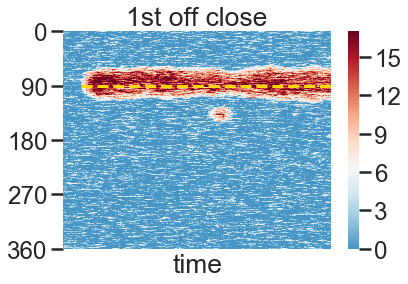

In [44]:
# 1st off close
fee=1
fei=1
fie=1
fii=1

## Example
an = model(totalTime=1500, targ_onset_1=100, targ_onset_2=800, angle_target_i=90, presentation_period=100,
           angle_separation=49, tauE=20, tauI=10,  n_stims=2, I0E=0.05, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=10., sigI=5., 
           kappa_E=45, 
           kappa_I=0.5, 
           kappa_stim=40., N=512, stim_strengthE=9.20, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False) 



RE_sorted=flipud(an[4])
sns.heatmap(RE_sorted, cmap=pal_cyan, vmin=0, vmax=17,  cbar=True)
plt.gca().set_ylabel('')
plt.gca().set_xlabel('')
plt.gca().set_title('1st off close')
plt.gca().plot([stimon, nsteps], [p_targ2, p_targ2], ls='--', color =ltc, linewidth=lw_t) ## flipped, so it is p_target 
plt.gca().set_xticks([])
plt.gca().set_yticks([0, N/4, N/2,  3*N/4, N ])
plt.gca().set_yticklabels(['0','90','180', '270', '360'])
plt.gca().set_xlabel('time');

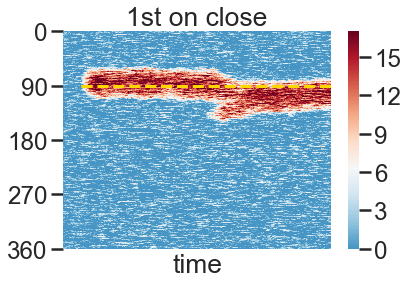

In [45]:
# 1st ON close
fee=1
fei=1
fie=1
fii=1

## Example
an = model(totalTime=1500, targ_onset_1=100, targ_onset_2=800, angle_target_i=90, presentation_period=100,
           angle_separation=49, tauE=20, tauI=10,  n_stims=2, I0E=0.5, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=10., sigI=5., 
           kappa_E=45, 
           kappa_I=0.5, 
           kappa_stim=40., N=512, stim_strengthE=9.20, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False) 

RE_sorted=flipud(an[4])
sns.heatmap(RE_sorted, cmap=pal_cyan, vmin=0, vmax=17,  cbar=True)
plt.gca().set_ylabel('')
plt.gca().set_xlabel('')
plt.gca().set_title('1st on close')
plt.gca().plot([stimon, nsteps], [p_targ2, p_targ2], ls='--', color =ltc, linewidth=lw_t) ## flipped, so it is p_target 
plt.gca().set_xticks([])
plt.gca().set_yticks([0, N/4, N/2,  3*N/4, N ])
plt.gca().set_yticklabels(['0','90','180', '270', '360'])
plt.gca().set_xlabel('time');

In [ ]:
# 1st off far
fee=1
fei=1
fie=1
fii=1

## Example
an = model(totalTime=1500, targ_onset_1=100, targ_onset_2=800, angle_target_i=90, presentation_period=100,
           angle_separation=135, tauE=20, tauI=10,  n_stims=2, I0E=0.05, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=10., sigI=5., 
           kappa_E=45, 
           kappa_I=0.5, 
           kappa_stim=40., N=512, stim_strengthE=9.20, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=True , plot_fit=False) 


RE_sorted=flipud(an[4])
sns.heatmap(RE_sorted, cmap=pal_cyan, vmin=0, vmax=17,  cbar=True)
plt.gca().set_ylabel('')
plt.gca().set_xlabel('')
plt.gca().set_title('1st off far')
plt.gca().plot([stimon, nsteps], [p_targ2, p_targ2], ls='--', color =ltc, linewidth=lw_t) ## flipped, so it is p_target 
plt.gca().set_xticks([])
plt.gca().set_yticks([0, N/4, N/2,  3*N/4, N ])
plt.gca().set_yticklabels(['0','90','180', '270', '360'])
plt.gca().set_xlabel('time');

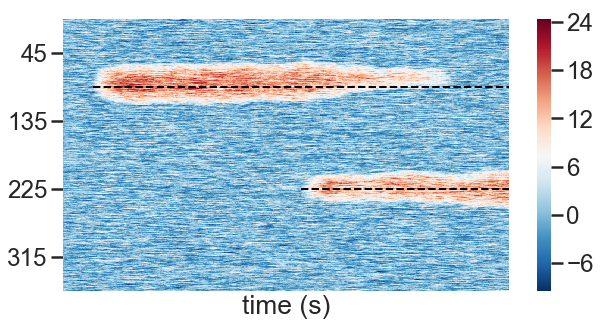

In [30]:
# 1st on far
fee=1
fei=1
fie=1
fii=1

## Example
an = model(totalTime=1500, targ_onset_1=100, targ_onset_2=800, angle_target_i=90, presentation_period=100,
           angle_separation=135, tauE=20, tauI=10,  n_stims=2, I0E=-.5, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=10., sigI=5., 
           kappa_E=45, 
           kappa_I=0.5, 
           kappa_stim=40., N=512, stim_strengthE=9.20, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=True , plot_fit=False) 